# Webscraping Free Online Classes

### By Alex Lau

## Table of Contents

- [Problem Statement](#Problem-Statement)
- [Import Packages](#Import-Packages)
- [Webscraping Data](#Webscraping-Data)
    - [Coursera](#Coursera)
    - [Udemy](#Udemy)
    - [EdX](#EdX)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    - [High-Level Checks](#High-Level-Checks)
    - [Investigating Features](#Investigating-Features)
- [Output File](#Output-File)

## Problem Statement

The current COVID-19 pandemic has caused huge disruption to health and economies around the world. Our federal and many of our local governments have mandated quanrantine rules. Many people have lost their jobs, most likely their sole source of income. As many of us are staying home and praticing social distancing, this has also become an opportunity to take advantage of learning new skills whether it be for self improvement, or to become competitive in an increasingly digital world. We will attempt to pull data from 3 online course platforms (Coursera, Udemy, EdX) and consolidate to a single data frame to provide a convenient connected platform. Paid courses from these platforms are wonderful, with some shareable certificates, or even complete degrees, however, in the wake of massive unemployment, we will focus on the free ones in this project.

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns

from bs4 import BeautifulSoup
from requests import get
from time import sleep
from random import randint
from selenium import webdriver

## Webscraping Data

In [2]:
# initial data storage
titles = []
free = []
online_course_organizations = []
author_organizations = []
course_types = []
levels = []
ratings = []
reviews = []

In [3]:
headers = {"Accept-Language": "en-US, en;q=0.5"}

### Coursera

In [4]:
# there are 100 pages in the Coursera list of courses
pages = np.arange(1, 101, 1)

for page in pages:
    page = requests.get("https://www.coursera.org/search?page=" + str(page) + "&index=prod_all_products_term_optimization", headers = headers)
    soup = BeautifulSoup(page.text, 'html.parser')
    
    course_div = soup.find_all('li', class_='ais-InfiniteHits-item')
    
    sleep(1)
    
    for container in course_div:
    
        name = container.h2.text if container.h2 else ''
        titles.append(name)
  
        
        if container.a:
            if container.a.find('span', class_ = '_xigqni rc-FreePill'):
                is_free = container.a.find('span', class_ = '_xigqni rc-FreePill').text
            else:
                is_free = 'Paid'
        else: 
             is_free = 'Paid'
        free.append(is_free)

        online_course_organizations.append('Coursera')

        course_type = container.a.find('div', class_='_jen3vs _1d8rgfy3').text if container.a else ''
        course_types.append(course_type)

        author_organization = container.a.find('span', class_= 'partner-name').text if container.a else ''
        author_organizations.append(author_organization)

        level = container.a.find('span', class_='difficulty').text if container.a else ''
        levels.append(level)

        if container.a:
            if container.a.find('span', class_='ratings-text'):
                rating = float(container.a.find('span', class_='ratings-text').text)
            else:
                rating = ''
        else: 
            rating = ''
        ratings.append(rating)

        if container.a.find('span', class_='ratings-count'):
            review = int(container.a.find('span', class_='ratings-count').span.text.replace(',', ''))
        else:
            review = ''
        reviews.append(review)

In [5]:
# consolidating lists of each field into a single data frame
coursera_courses = pd.DataFrame({
        'title': titles,
        'online_course_organization': online_course_organizations,
        'free': free,
        'author_organization': author_organizations,
        'course_type': course_types,
        'level': levels,
        'ratings': ratings,
        'reviews': reviews
    })

In [6]:
# Checking first 10 rows
coursera_courses.head(10)

,title,online_course_organization,free,author_organization,course_type,level,ratings,reviews
0,The Science of Well-Being,Coursera,Free,Yale University,COURSE,Mixed,4.9,5223
1,IBM Data Science,Coursera,Paid,IBM,PROFESSIONAL CERTIFICATE,Beginner,4.6,44267
2,Introduction to Data Science,Coursera,Paid,IBM,SPECIALIZATION,Beginner,4.6,34976
3,Google IT Support,Coursera,Paid,Google,PROFESSIONAL CERTIFICATE,Beginner,4.8,30930
4,Python for Everybody,Coursera,Paid,University of Michigan,SPECIALIZATION,Beginner,4.8,104445
5,Deep Learning,Coursera,Paid,deeplearning.ai,SPECIALIZATION,Intermediate,4.8,83752
6,Business Foundations,Coursera,Paid,University of Pennsylvania,SPECIALIZATION,Beginner,4.7,15193
7,Machine Learning,Coursera,Free,Stanford University,COURSE,Mixed,4.9,131878
8,Applied Data Science,Coursera,Paid,IBM,SPECIALIZATION,Beginner,4.6,18369
9,Data Science,Coursera,Paid,Johns Hopkins University,SPECIALIZATION,Beginner,4.5,34362


In [7]:
# viewing the paid courses
coursera_courses[coursera_courses['free'] == 'Paid']

,title,online_course_organization,free,author_organization,course_type,level,ratings,reviews
1,IBM Data Science,Coursera,Paid,IBM,PROFESSIONAL CERTIFICATE,Beginner,4.6,44267
2,Introduction to Data Science,Coursera,Paid,IBM,SPECIALIZATION,Beginner,4.6,34976
3,Google IT Support,Coursera,Paid,Google,PROFESSIONAL CERTIFICATE,Beginner,4.8,30930
4,Python for Everybody,Coursera,Paid,University of Michigan,SPECIALIZATION,Beginner,4.8,104445
5,Deep Learning,Coursera,Paid,deeplearning.ai,SPECIALIZATION,Intermediate,4.8,83752
...,...,...,...,...,...,...,...,...
995,"Â¿CÃ³mo persuadir? Jugando con palabras, imÃ¡g...",Coursera,Paid,Universitat AutÃ²noma de Barcelona,COURSE,Beginner,4.4,1394
996,Introduction to Git and GitHub,Coursera,Paid,Google,COURSE,Beginner,4.8,491
997,InglÃ©s Empresarial,Coursera,Paid,Arizona State University,SPECIALIZATION,Intermediate,4.7,655
998,"HTML, CSS, and Javascript for Web Developers",Coursera,Paid,Johns Hopkins University,COURSE,Mixed,4.8,5642


In [8]:
# removing the rows with paid courses. 
paid_index = coursera_courses[coursera_courses['free'] == 'Paid'].index
coursera_courses.drop(index = paid_index, inplace = True)

In [9]:
# checking only free courses remain
coursera_courses.head()

,title,online_course_organization,free,author_organization,course_type,level,ratings,reviews
0,The Science of Well-Being,Coursera,Free,Yale University,COURSE,Mixed,4.9,5223
7,Machine Learning,Coursera,Free,Stanford University,COURSE,Mixed,4.9,131878
14,Financial Markets,Coursera,Free,Yale University,COURSE,Beginner,4.8,5316
96,What Is Contemporary Art?,Coursera,Free,The Museum of Modern Art,COURSE,Beginner,4.6,367
97,Learning How to Learn: Powerful mental tools t...,Coursera,Free,McMaster University,COURSE,Mixed,4.8,54028


### Udemy

Udemy blocks us from web scraping. We need more time to troubleshoot.

In [10]:
# Udemy blocks us from web scraping
# target webpage
url = "https://www.udemy.com/"

# Establishing the connection to the web page:
response = requests.get(url)

# You can use status codes to understand how the target server responds to your request.
# Ex., 200 = OK, 400 = Bad Request, 403 = Forbidden, 404 = Not Found.
print(response.status_code)

# Pull the HTML string out of requests and convert it to a Python string.
html = response.text

403


In [11]:
# # refreshing columns for udemy
# titles = []
# free = []
# online_course_organizations = []
# author_organizations = []
# course_types = []
# levels = []
# ratings = []
# reviews = []

In [12]:
# udemy_courses = pd.DataFrame({
#         'title': titles,
#         'online_course_organization': online_course_organizations,
#         'free': free,
#         'author_organization': author_organizations,
#         'course_type': course_types,
#         'level': levels,
#         'ratings': ratings,
#         'reviews': reviews
#     })

### EdX

In [13]:
# refreshing columns for EdX
titles = []
free = []
online_course_organizations = []
author_organizations = []
course_types = []
levels = []
ratings = []
reviews = []

In [14]:
# target webpage
url = "https://www.edx.org/course"

# Establishing the connection to the web page:
response = requests.get(url)

# You can use status codes to understand how the target server responds to your request.
# Ex., 200 = OK, 400 = Bad Request, 403 = Forbidden, 404 = Not Found.
print(response.status_code)

# Pull the HTML string out of requests and convert it to a Python string.
html = response.text

200


EdX webscrape attempt returns different results than a manual check. Need to review other methods. 

In [15]:
# EdX lists courses in a single page, continuous scroll
page = requests.get("https://www.edx.org/course", headers = headers)
soup = BeautifulSoup(page.text, 'html.parser')
print(soup)
# course_div = soup.find_all('div', class_='discovery-card course-card shadow verified')

<!DOCTYPE html>

<!--[if IEMobile 7]><html class="iem7" lang="en" dir="ltr"><![endif]-->
<!--[if lte IE 6]><html class="lte-ie9 lt-ie9 lt-ie8 lt-ie7" lang="en" dir="ltr"><![endif]-->
<!--[if (IE 7)&(!IEMobile)]><html class="lte-ie9 lt-ie9 lt-ie8" lang="en" dir="ltr"><![endif]-->
<!--[if IE 8]><html class="lte-ie9 lt-ie9" lang="en" dir="ltr"><![endif]-->
<!--[if IE 9]><html class="lte-ie9" lang="en" dir="ltr"><![endif]-->
<!--[if (gte IE 9)|(gt IEMobile 7)]><!--><html dir="ltr" lang="en" prefix="og: http://ogp.me/ns# article: http://ogp.me/ns/article# book: http://ogp.me/ns/book# profile: http://ogp.me/ns/profile# video: http://ogp.me/ns/video# product: http://ogp.me/ns/product# content: http://purl.org/rss/1.0/modules/content/ dc: http://purl.org/dc/terms/ foaf: http://xmlns.com/foaf/0.1/ rdfs: http://www.w3.org/2000/01/rdf-schema# sioc: http://rdfs.org/sioc/ns# sioct: http://rdfs.org/sioc/types# skos: http://www.w3.org/2004/02/skos/core# xsd: http://www.w3.org/2001/XMLSchema# schema: 

## Exploratory Data Analysis

### High-Level Checks

In [16]:
# getting row and column lengths
coursera_courses.shape

(170, 8)

In [17]:
# listing out the columns
coursera_courses.columns

Index(['title', 'online_course_organization', 'free', 'author_organization',
       'course_type', 'level', 'ratings', 'reviews'],
      dtype='object')

In [18]:
coursera_courses.head()

,title,online_course_organization,free,author_organization,course_type,level,ratings,reviews
0,The Science of Well-Being,Coursera,Free,Yale University,COURSE,Mixed,4.9,5223
7,Machine Learning,Coursera,Free,Stanford University,COURSE,Mixed,4.9,131878
14,Financial Markets,Coursera,Free,Yale University,COURSE,Beginner,4.8,5316
96,What Is Contemporary Art?,Coursera,Free,The Museum of Modern Art,COURSE,Beginner,4.6,367
97,Learning How to Learn: Powerful mental tools t...,Coursera,Free,McMaster University,COURSE,Mixed,4.8,54028


In [19]:
# describing the data frame
coursera_courses.describe()

,title,online_course_organization,free,author_organization,course_type,level,ratings,reviews
count,170,170,170,170,170,170,170.0,170
unique,170,1,1,80,1,4,8.0,165
top,"CorrecciÃ³n, estilo y variaciones de la lengu...",Coursera,Free,Yale University,COURSE,Beginner,4.8,181
freq,1,170,170,11,170,83,77.0,2


In [20]:
coursera_courses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 983
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   title                       170 non-null    object
 1   online_course_organization  170 non-null    object
 2   free                        170 non-null    object
 3   author_organization         170 non-null    object
 4   course_type                 170 non-null    object
 5   level                       170 non-null    object
 6   ratings                     170 non-null    object
 7   reviews                     170 non-null    object
dtypes: object(8)
memory usage: 12.0+ KB


### Investigating Features

In [21]:
# all free courses are in the "Course" type. If you want a certificate, you'll need to pay
coursera_courses['course_type'].value_counts()

COURSE    170
Name: course_type, dtype: int64

In [22]:
# count of courses by levels
coursera_courses['level'].value_counts()

Beginner        83
Mixed           63
Intermediate    22
Advanced         2
Name: level, dtype: int64

In [ ]:
# count of courses by levels
coursera_courses['level'].value_counts(normalize = True)

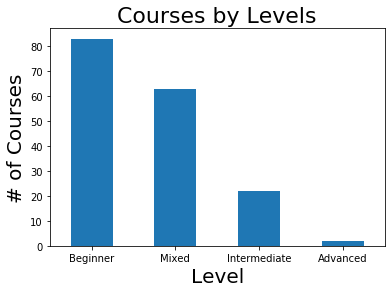

In [23]:
# visualizing the levels of courses
coursera_courses['level'].value_counts().plot(kind = 'bar')
plt.title('Courses by Levels', size = 22)
plt.ylabel('# of Courses', size = 20)
plt.xlabel('Level', size = 20)
plt.xticks(rotation = 0);

## Output File

In [24]:
# creating a csv file of the full list, do not include the index
coursera_courses.to_csv('../data/free_courses_list.csv', index = False)